In [1]:
import os 
import numpy as np
from numpy import random
import tensorflow as tf
import pandas as pd  
import matplotlib.pyplot as plt  
import sys
#You have freedom of using eager execution in tensorflow
#Instead of using With tf.Session() as sess you can use sess.run() whenever needed

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



In [2]:
def softmax_loss(X, y):
# Forward pass
    N = int(X.shape[0])
    X -= tf.reduce_max(X, axis=1, keepdims=True)
    exp_vals = tf.exp(X)
    probs = exp_vals / tf.reduce_sum(exp_vals)
    loss = -np.mean(np.log(probs.eval()[range(N), y]))

# Backward pass
    dX = tf.convert_to_tensor(probs).eval()
    dX[range(N), y] -= 1
    dX /= N
    return loss, probs, dX

In [3]:
def computeCost(X,y,theta,reg):
    # WRITEME: write your code here to complete the routine
    ###########################################
    
    W1, b1, W2, b2 = theta[0], theta[1], theta[2], theta[3]
    z = tf.matmul(X,W1) + b1       # FC1
    h = tf.maximum(tf.cast(0,tf.float64), tf.cast(z, tf.float64))     # ReLU
    f = tf.matmul(h,W2) + b2       # FC2
    data_loss, _, _ = softmax_loss(f, y) # Softmax
    reg_loss = 0.5 * reg * tf.reduce_sum(W1**2) + 0.5 * reg * tf.reduce_sum(W2**2)
    loss = data_loss + reg_loss
    
    ###########################################
    
    return loss

In [4]:
def computeGrad(X,y,theta,reg): # returns nabla
    
    ############################################
    W1, b1, W2, b2 = theta[0], theta[1], theta[2], theta[3]
    z = tf.matmul(X,W1) + b1         # FC1
    h = tf.maximum(tf.cast(0,tf.float64), tf.cast(z,tf.float64))       # ReLU
    f = tf.matmul(h,W2) + b2         # FC2
    _, _, df = softmax_loss(f, y) # Softmax
    dh = tf.matmul(df,tf.transpose(W2))
    dz = tf.convert_to_tensor(dh).eval()
    dz[z.eval() <= 0] = 0
    
    ############################################
    
    # WRITEME: write your code here to complete the routine
   
    ############################################
    dW2 = tf.matmul(tf.transpose(h), df) + reg * W2
    db2 = tf.reduce_sum(df, axis=0)
    dW1 = tf.matmul(tf.transpose(X), dz) + reg * W1
    db1 = tf.reduce_sum(dz, axis=0)
    
    ############################################
    
    return dW1,db1,dW2,db2

In [5]:
def predict(X,theta):
    # WRITEME: write your code here to complete the routine
    
    ##################################################
    W1, b1, W2, b2 = theta[0], theta[1], theta[2], theta[3]
    z = tf.matmul(X,W1) + b1         # FC1
    h = tf.maximum(tf.cast(0,tf.float64), tf.cast(z,tf.float64))       # ReLU
    scores = tf.matmul(h,W2) + b2         # FC2
    probs = tf.exp(scores - tf.reduce_max(scores, axis=1, keepdims=True))
    probs /= tf.reduce_sum(probs, axis=1, keepdims=True)
    
    #################################################
    return scores,probs

In [6]:
np.random.seed(0)
# Load in the data from disk
path = os.getcwd() + '/spiral_train.dat'  
data = pd.read_csv(path, header=None) 

In [7]:
# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 

In [8]:
# convert from data frames to numpy matrices
X = np.array(X.values)  
y = np.array(y.values)
y = y.flatten()
X_tf = tf.constant(X)
Y_tf = tf.constant(y)
# initialize parameters randomly
D = X.shape[1]
K = np.amax(y) + 1

In [9]:
# initialize parameters randomly
h = 300 # size of hidden layer
initializer = tf.random_normal_initializer(mean=0.0, stddev=0.01, seed=None, dtype=tf.float64)
W = tf.Variable(initializer([D, h]),dtype=tf.float64)
b = tf.Variable(tf.random_normal([h], dtype=tf.float64),dtype=tf.float64)
W2 = tf.Variable(initializer([h, K]),dtype=tf.float64)
b2 = tf.Variable(tf.random_normal([K],dtype=tf.float64),dtype=tf.float64)
theta = (W,b,W2,b2)


In [10]:
# some hyperparameters
n_e = 100
check = 10 # every so many pass/epochs, print loss/error to terminal
step_size = 0.001
reg = 0.0001 # regularization strength
loss_vs_epochs = []

In [11]:
# gradient descent loop
init = tf.initialize_all_variables()
with tf.Session() as sess:
    
    sess.run(init)


    for i in range(n_e):
        # WRITEME: write your code here to perform a step of gradient descent & record anything else desired for later
        #loss = 0.0
        #######################################
        theta = (W, b, W2, b2)
        loss = computeCost(X,y,theta,reg).eval()
        loss_vs_epochs.append(loss)
        #######################################
        if i % check == 0:
            print ("iteration %d: loss %f" % (i, loss))

        # perform a parameter update
        # WRITEME: write your update rule(s) here
        
        ##########################################
        dW1, db1, dW2, db2 = computeGrad(X,y,theta,reg)
        W = W - step_size * dW1
        b = b - step_size * db1
        W2 = W2 - step_size * dW2
        b2 = b2 - step_size * db2
        ##########################################
    
 
# TODO: remove this line below once you have correctly implemented/gradient-checked your various sub-routines
#sys.exit(0) 
  
    scores, probs = predict(X,theta)
    predicted_class = sess.run(tf.argmax(scores, axis=1))
    #print ('training accuracy: %.2f' % (sess.run(tf.reduce_mean(predicted_class == y))))
    print ('training accuracy: %.2f%%' % (100*np.mean(predicted_class == y)))




Instructions for updating:
Use `tf.global_variables_initializer` instead.
iteration 0: loss 7.227828
iteration 10: loss 7.227006
iteration 20: loss 7.226185
iteration 30: loss 7.225364
iteration 40: loss 7.224543
iteration 50: loss 7.223722
iteration 60: loss 7.222902
iteration 70: loss 7.222081
iteration 80: loss 7.221261
iteration 90: loss 7.220441
training accuracy: 33.33%


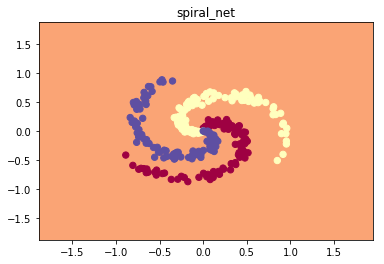

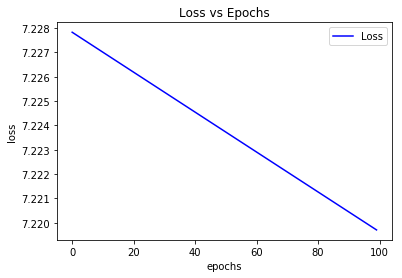

In [12]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

xx1 = xx.ravel()
yy1 = yy.ravel()

with tf.Session() as sess:
    sess.run(init)
    Z, P = predict(np.c_[xx1,yy1],theta)
    ZZZ = Z.eval()

ZZ = []
for _ in range(ZZZ.shape[0]):
    ZZ.append(np.argmax(ZZZ[i]))
    
Z = np.reshape(ZZ, xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('spiral_net')
plt.savefig(os.getcwd() + '/DLAssign2Problem1d/spiral_net')
plt.show()

plt.figure()
plt.plot(loss_vs_epochs, color = 'b', label = "Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss vs Epochs")
plt.legend(loc="best")
plt.savefig(os.getcwd() + '/DLAssign2Problem1d/Loss vs Epoch')
plt.show() # convenience command to force plots to pop up on desktop
